In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_excel("Rent.xlsx")

In [26]:
df['Rent'].head(8)

0    31500
1    35000
2    41050
3    36100
4    52100
5    32500
6    20000
7    24500
Name: Rent, dtype: int64

In [27]:
df['Area'].tail(5)

55    3100
56    2750
57    1800
58    2200
59    3100
Name: Area, dtype: int64

In [28]:
df[5:10]

,Area,Rent
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


# Visulization

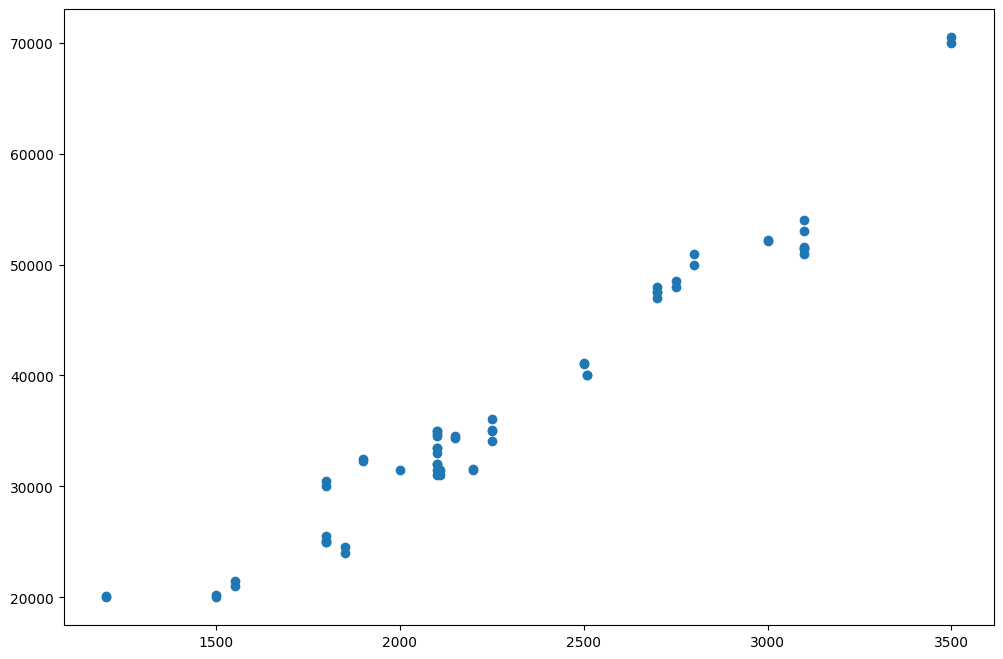

In [29]:
plt.figure(figsize=(12,8)) 
plt.scatter(df.Area,df.Rent)


Text(0.5, 1.0, 'Rent Plot')

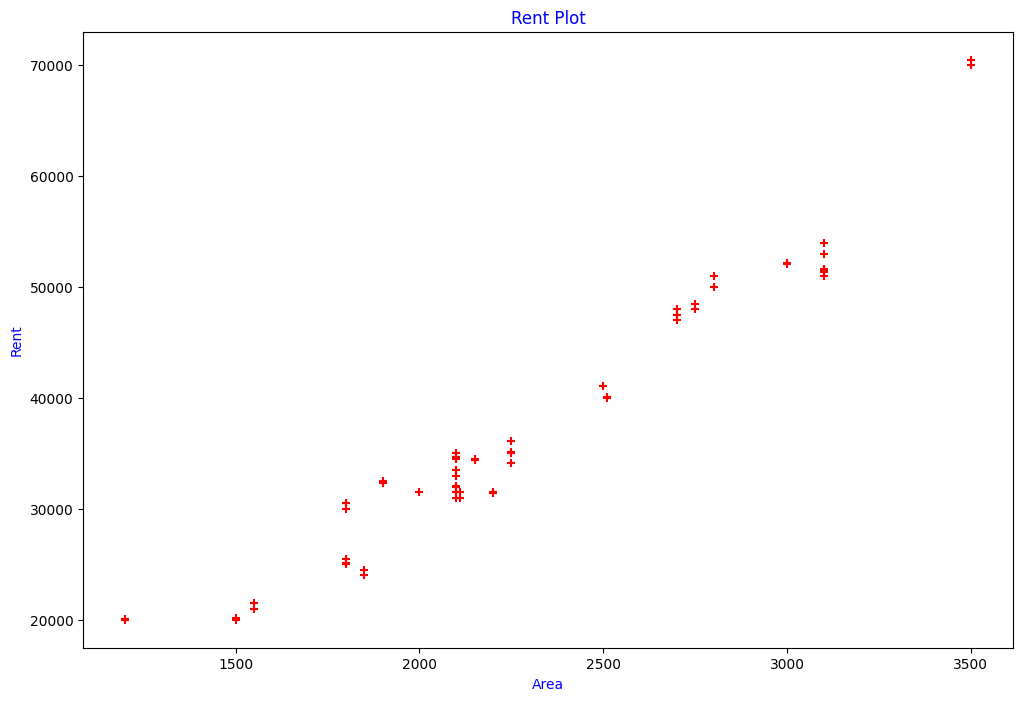

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df.Area,df.Rent,marker="+",color="red")
plt.xlabel("Area",color="blue")
plt.ylabel("Rent",color="blue")
plt.title("Rent Plot",color="blue")


In [31]:
x=df[["Area"]]
x.head()

,Area
0,2000
1,2100
2,2500
3,2250
4,3000


In [32]:
y=df["Rent"]
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: Rent, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split as tts

In [34]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=45)

In [35]:
xtrain.head()

,Area
54,2800
33,2250
20,2110
16,1800
29,3100


In [36]:
xtest.head()

,Area
5,1900
26,2750
57,1800
39,2100
36,1500


In [37]:
ytrain.head()

54    51000
33    35100
20    31500
16    30500
29    51400
Name: Rent, dtype: int64

In [38]:
ytest.head()

5     32500
26    48000
57    25100
39    31500
36    20200
Name: Rent, dtype: int64

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression()

In [41]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [42]:
m = reg.coef_

In [43]:
reg.predict([[2100]])

array([33402.32062599])

In [44]:
pred=reg.predict(xtest)
pred

array([29108.76203028, 47356.38606204, 26961.98273243, 33402.32062599,
       20521.64483887, 33616.99855577, 33402.32062599, 46282.99641311,
       54870.11360453, 26961.98273243, 42204.11574719, 28035.37238135,
       31255.54132814, 21595.03448779, 28035.37238135, 14081.3069453 ,
       41989.4378174 , 33402.32062599])

In [45]:
df["Predicted Result"]= reg.predict(x)

In [46]:
df.head()

,Area,Rent,Predicted Result
0,2000,31500,31255.541328
1,2100,35000,33402.320626
2,2500,41050,41989.437817
3,2250,36100,36622.489573
4,3000,52100,52723.334307


In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mse = mean_squared_error(ytest,pred)

In [49]:
mse

6226988.947375975

In [50]:
mae = mean_absolute_error(ytest,pred)
mae

2003.2990625686434

# Best Fit Line

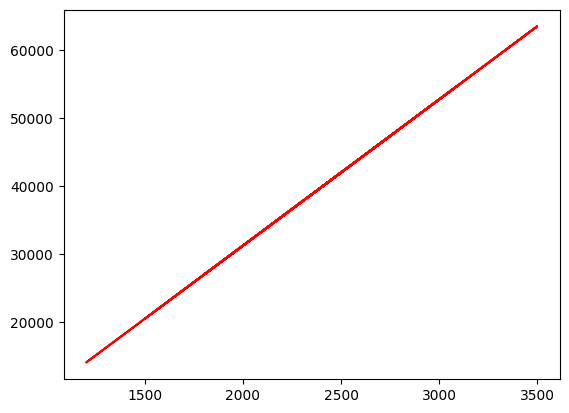

In [51]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

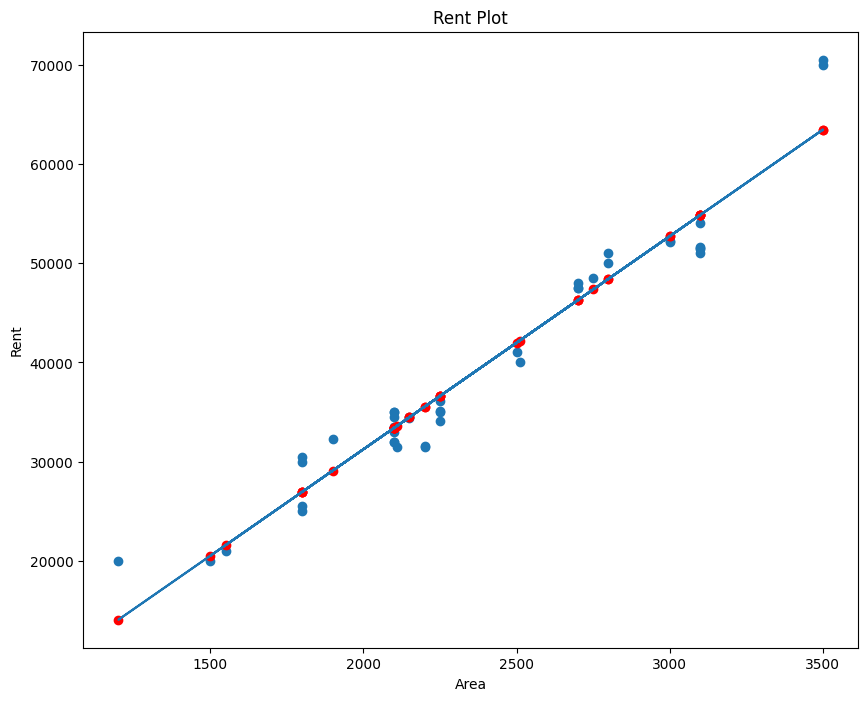

In [52]:
plt.figure(figsize=(10,8))
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")


In [53]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9334458350850554

In [54]:
xtest.to_csv("xtest.csv")

In [55]:
xtest.head()

,Area
5,1900
26,2750
57,1800
39,2100
36,1500


In [56]:
len(xtest)

18

# save Model

In [57]:
import pickle as pk
import joblib as jb

In [58]:
pk.dump(reg,open("first","wb"))

In [59]:
reg2 =pk.load(open("first","rb"))

In [60]:
reg2.predict([[2000]])

array([31255.54132814])

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
jb.dump(reg,"second")

['second']